In [1]:
install.packages("HistData")
library(HistData)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
install.packages("FNN")
library(FNN)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
data(GaltonFamilies)

gender_bin <- rep(0, nrow(GaltonFamilies))
gender_bin[GaltonFamilies$gender == 'male'] <- 1
GaltonFamilies <- data.frame(GaltonFamilies, gender_bin)

childHeight_scale <- rep(1, nrow(GaltonFamilies))
childHeight_scale[GaltonFamilies$gender == 'female'] <- 1.08
childHeight_male <- GaltonFamilies$childHeight * childHeight_scale
GaltonFamilies <- data.frame(GaltonFamilies, childHeight_male)

GaltonFamilies = subset(GaltonFamilies, select = -c(family, children, childNum, gender))
head(GaltonFamilies)

,father,mother,midparentHeight,childHeight,gender_bin,childHeight_male
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,78.5,67.0,75.43,73.2,1,73.200
2,78.5,67.0,75.43,69.2,0,74.736
3,78.5,67.0,75.43,69.0,0,74.520
4,78.5,67.0,75.43,69.0,0,74.520
5,75.5,66.5,73.66,73.5,1,73.500
6,75.5,66.5,73.66,72.5,1,72.500


In [ ]:
set.seed(1)
n <- dim(GaltonFamilies)[1]
ntest <- 200

train <- sample(1:n, n-ntest, replace = FALSE) 
traindata <- GaltonFamilies[train,c("father", "mother", "gender_bin")]
traindata_y <- GaltonFamilies[train,c("childHeight")]
testdata <- GaltonFamilies[-train,c("father", "mother", "gender_bin")]
testdata_y <- GaltonFamilies[-train,c("childHeight")]

# trainMean <- apply(traindata,2,mean)
# trainSd <- apply(traindata,2,sd)
trainMean <- apply(GaltonFamilies[train,c("father", "mother", "gender_bin")],2,mean)
trainSd <- apply(GaltonFamilies[train,c("father", "mother", "gender_bin")],2,sd)

traindata <- sweep(sweep(traindata, 2L, trainMean), 2, trainSd, "/")
testdata <- sweep(sweep(testdata, 2L, trainMean), 2, trainSd, "/")

traindata["childHeight"] = traindata_y
testdata["childHeight"] = testdata_y

head(traindata)

In [ ]:
names(MSE) <- c("lm")

height_baseline_pred <- c(0,ntest)

fit_baseline <- lm(childHeight ~ . + father*mother, data = traindata)

k <- knn(
    traindata[,c("father", "mother", "gender_bin")], 
    testdata[,c("father", "mother", "gender_bin")], 
    traindata[,"childHeight"], 
    k = 3)
indices = attr(k, "nn.index")

for (i in 1:ntest){
    pred_knn = predict(fit_baseline,data.frame(traindata[indices[i,],]))
    pred = predict(fit_baseline,testdata[i,])
    # height_baseline_pred[i] <- mean(pred_knn, pred)
    alpha = 0.8
    # height_baseline_pred[i] <- alpha*pred + (1-alpha)*mean(pred_knn)
    height_baseline_pred[i] <- alpha*pred + (1-alpha)*mean(traindata[indices[i,],]$childHeight)
}

MSE <- mean((testdata$childHeight - height_baseline_pred)^2)
MSE

[1] 4.390196

In [ ]:
nrep <- 100
n <- dim(GaltonFamilies)[1]
ntest <- 200
MSE <- data.frame(matrix(0,nrep,1))
names(MSE) <- c("lm")
set.seed(1)
for (i in 1:nrep){

data(GaltonFamilies)

gender_bin <- rep(0, nrow(GaltonFamilies))
gender_bin[GaltonFamilies$gender == 'male'] <- 1
GaltonFamilies <- data.frame(GaltonFamilies, gender_bin)

GaltonFamilies = subset(GaltonFamilies, select = -c(family, children, childNum, gender))

n <- dim(GaltonFamilies)[1]

train <- sample(1:n, n-ntest, replace = FALSE) 
traindata <- GaltonFamilies[train,c("father", "mother", "gender_bin")]
traindata_y <- GaltonFamilies[train,c("childHeight")]
testdata <- GaltonFamilies[-train,c("father", "mother", "gender_bin")]
testdata_y <- GaltonFamilies[-train,c("childHeight")]

# trainMean <- apply(traindata,2,mean)
# trainSd <- apply(traindata,2,sd)
trainMean <- apply(GaltonFamilies[train,c("father", "mother", "gender_bin")],2,mean)
trainSd <- apply(GaltonFamilies[train,c("father", "mother", "gender_bin")],2,sd)

traindata <- sweep(sweep(traindata, 2L, trainMean), 2, trainSd, "/")
testdata <- sweep(sweep(testdata, 2L, trainMean), 2, trainSd, "/")

traindata["childHeight"] = traindata_y
testdata["childHeight"] = testdata_y


fit_baseline <- lm(childHeight ~ . + father*mother, data = traindata)

knn_k = 3
k <- knn(
    traindata[,c("father", "mother", "gender_bin")], 
    testdata[,c("father", "mother", "gender_bin")], 
    traindata[,"childHeight"], 
    k = knn_k)
indices = attr(k, "nn.index")
height_baseline_pred <- c(0,ntest)

for (j in 1:ntest){
    pred_knn = predict(fit_baseline,data.frame(traindata[indices[j,],]))
    pred = predict(fit_baseline,testdata[j,])
    # height_baseline_pred[j] <- mean(pred_knn, pred)
    alpha = 0.7
    # height_baseline_pred[j] <- alpha*pred + (1-alpha)*mean(pred_knn)
    height_baseline_pred[j] <- alpha*pred + (1-alpha)*mean(traindata[indices[j,],]$childHeight)
}

MSE[i,1] <- mean((testdata$childHeight - height_baseline_pred)^2)
}
print(sum(MSE)/nrep)

# knn_k

In [ ]:
nrep <- 30 # 100
n <- dim(GaltonFamilies)[1]
ntest <- 200
MSE <- data.frame(matrix(0,nrep,1))
names(MSE) <- c("lm")
for (knn_k in 1:25){
# for (alpha in c(0.65,0.7,0.75)){
set.seed(1)
for (i in 1:nrep){

data(GaltonFamilies)

gender_bin <- rep(0, nrow(GaltonFamilies))
gender_bin[GaltonFamilies$gender == 'male'] <- 1
GaltonFamilies <- data.frame(GaltonFamilies, gender_bin)

childHeight_scale <- rep(1, nrow(GaltonFamilies))
childHeight_scale[GaltonFamilies$gender == 'female'] <- 1.08
childHeight_male <- GaltonFamilies$childHeight * childHeight_scale
GaltonFamilies <- data.frame(GaltonFamilies, childHeight_male)

GaltonFamilies = subset(GaltonFamilies, select = -c(family, children, childNum, gender))

n <- dim(GaltonFamilies)[1]

train <- sample(1:n, n-ntest, replace = FALSE) 
traindata <- GaltonFamilies[train,c("father", "mother", "gender_bin")]
traindata_y <- GaltonFamilies[train,c("childHeight", "childHeight_male")]
testdata <- GaltonFamilies[-train,c("father", "mother", "gender_bin")]
testdata_y <- GaltonFamilies[-train,c("childHeight", "childHeight_male")]

trainMean <- apply(traindata,2,mean)
trainSd <- apply(traindata,2,sd)
# trainMean <- apply(GaltonFamilies[train,c("father", "mother", "gender_bin")],2,mean)
# trainSd <- apply(GaltonFamilies[train,c("father", "mother", "gender_bin")],2,sd)

traindata <- sweep(sweep(traindata, 2L, trainMean), 2, trainSd, "/")
testdata <- sweep(sweep(testdata, 2L, trainMean), 2, trainSd, "/")

traindata["childHeight"] = traindata_y["childHeight"]
testdata["childHeight"] = testdata_y["childHeight"]
traindata["childHeight_male"] = traindata_y["childHeight_male"]
testdata["childHeight_male"] = testdata_y["childHeight_male"]


fit_baseline <- lm(childHeight ~ . + father*mother, data = traindata)

# knn_k = 3
k <- knn(
    traindata[,c("father", "mother", "gender_bin")], # , "gender_bin"
    testdata[,c("father", "mother", "gender_bin")], 
    traindata[,"childHeight"], 
    k = knn_k)
indices = attr(k, "nn.index")
height_baseline_pred <- c(0,ntest)

for (j in 1:ntest){
    pred_knn = predict(fit_baseline,data.frame(traindata[indices[j,],]))
    print(pred_knn)
    pred = predict(fit_baseline,testdata[j,])
    # height_baseline_pred[j] <- mean(pred_knn, pred)
    alpha = 0
    height_baseline_pred[j] <- alpha*pred + (1-alpha)*mean(pred_knn)
    # height_baseline_pred[j] <- alpha*pred + (1-alpha)*mean(traindata[indices[j,],]$childHeight)
    # if (testdata[j,]$gender_bin == 1){
    #     height_baseline_pred[j] <- alpha*pred + (1-alpha)*mean(traindata[indices[j,knn_k],]$childHeight)
    # }
    # else{
    #     height_baseline_pred[j] <- alpha*pred + (1-alpha)*mean(traindata[indices[j,knn_k],]$childHeight)
    # }
}

MSE[i,1] <- mean((testdata$childHeight - height_baseline_pred)^2)
}
print(sum(MSE)/nrep)
print(knn_k)
flush.console()
}

# alpha

In [ ]:
nrep <- 20 # 100
n <- dim(GaltonFamilies)[1]
ntest <- 200
MSE <- data.frame(matrix(0,nrep,1))
names(MSE) <- c("lm")
# for (knn_k in 1:25){
for (alpha in seq(0,1,0.05)){
set.seed(1)
for (i in 1:nrep){

data(GaltonFamilies)

gender_bin <- rep(0, nrow(GaltonFamilies))
gender_bin[GaltonFamilies$gender == 'male'] <- 1
GaltonFamilies <- data.frame(GaltonFamilies, gender_bin)

GaltonFamilies = subset(GaltonFamilies, select = -c(family, children, childNum, gender))

n <- dim(GaltonFamilies)[1]

train <- sample(1:n, n-ntest, replace = FALSE) 
traindata <- GaltonFamilies[train,c("father", "mother", "gender_bin")]
traindata_y <- GaltonFamilies[train,c("childHeight")]
testdata <- GaltonFamilies[-train,c("father", "mother", "gender_bin")]
testdata_y <- GaltonFamilies[-train,c("childHeight")]

# trainMean <- apply(traindata,2,mean)
# trainSd <- apply(traindata,2,sd)
trainMean <- apply(GaltonFamilies[train,c("father", "mother", "gender_bin")],2,mean)
trainSd <- apply(GaltonFamilies[train,c("father", "mother", "gender_bin")],2,sd)

traindata <- sweep(sweep(traindata, 2L, trainMean), 2, trainSd, "/")
testdata <- sweep(sweep(testdata, 2L, trainMean), 2, trainSd, "/")

traindata["childHeight"] = traindata_y
testdata["childHeight"] = testdata_y


fit_baseline <- lm(childHeight ~ . + father*mother, data = traindata)

knn_k = 20
k <- knn(
    traindata[,c("father", "mother", "gender_bin")], 
    testdata[,c("father", "mother", "gender_bin")], 
    traindata[,"childHeight"], 
    k = knn_k)
indices = attr(k, "nn.index")
height_baseline_pred <- c(0,ntest)

for (j in 1:ntest){
    pred_knn = predict(fit_baseline,data.frame(traindata[indices[j,],]))
    pred = predict(fit_baseline,testdata[j,])
    # height_baseline_pred[j] <- mean(pred_knn, pred)
    # alpha = 0
    # height_baseline_pred[j] <- alpha*pred + (1-alpha)*mean(pred_knn)
    height_baseline_pred[j] <- alpha*pred + (1-alpha)*mean(traindata[indices[j,],]$childHeight)
}

MSE[i,1] <- mean((testdata$childHeight - height_baseline_pred)^2)
}
print(sum(MSE)/nrep)
print(alpha)
flush.console()
}

[1] 4.704145
[1] 0
[1] 4.67976
[1] 0.05
[1] 4.657217
[1] 0.1
[1] 4.636518
[1] 0.15
[1] 4.617662
[1] 0.2
[1] 4.60065
[1] 0.25
[1] 4.58548
[1] 0.3
[1] 4.572154
[1] 0.35
[1] 4.560671
[1] 0.4
[1] 4.551032
[1] 0.45
[1] 4.543235
[1] 0.5
[1] 4.537282
[1] 0.55
[1] 4.533172
[1] 0.6
[1] 4.530906
[1] 0.65
[1] 4.530482
[1] 0.7
[1] 4.531902
[1] 0.75
[1] 4.535165
[1] 0.8
[1] 4.540271
[1] 0.85
[1] 4.547221
[1] 0.9
[1] 4.556014
[1] 0.95


# final

In [ ]:
nrep <- 100
n <- dim(GaltonFamilies)[1]
ntest <- 200
MSE <- data.frame(matrix(0,nrep,1))
names(MSE) <- c("lm")
# for (knn_k in 1:25){
# for (alpha in seq(0,1,0.05)){
set.seed(1)
for (i in 1:nrep){

data(GaltonFamilies)

gender_bin <- rep(0, nrow(GaltonFamilies))
gender_bin[GaltonFamilies$gender == 'male'] <- 1
GaltonFamilies <- data.frame(GaltonFamilies, gender_bin)

GaltonFamilies = subset(GaltonFamilies, select = -c(family, children, childNum, gender))

n <- dim(GaltonFamilies)[1]

train <- sample(1:n, n-ntest, replace = FALSE) 
traindata <- GaltonFamilies[train,c("father", "mother", "gender_bin")]
traindata_y <- GaltonFamilies[train,c("childHeight")]
testdata <- GaltonFamilies[-train,c("father", "mother", "gender_bin")]
testdata_y <- GaltonFamilies[-train,c("childHeight")]

# trainMean <- apply(traindata,2,mean)
# trainSd <- apply(traindata,2,sd)
trainMean <- apply(GaltonFamilies[train,c("father", "mother", "gender_bin")],2,mean)
trainSd <- apply(GaltonFamilies[train,c("father", "mother", "gender_bin")],2,sd)

traindata <- sweep(sweep(traindata, 2L, trainMean), 2, trainSd, "/")
testdata <- sweep(sweep(testdata, 2L, trainMean), 2, trainSd, "/")

traindata["childHeight"] = traindata_y
testdata["childHeight"] = testdata_y


fit_baseline <- lm(childHeight ~ . + father*mother, data = traindata)

knn_k = 15
k <- knn(
    traindata[,c("father", "mother", "gender_bin")], 
    testdata[,c("father", "mother", "gender_bin")], 
    traindata[,"childHeight"], 
    k = knn_k)
indices = attr(k, "nn.index")
height_baseline_pred <- c(0,ntest)

for (j in 1:ntest){
    pred_knn = predict(fit_baseline,data.frame(traindata[indices[j,],]))
    pred = predict(fit_baseline,testdata[j,])
    # height_baseline_pred[j] <- mean(pred_knn, pred)
    alpha = 1
    # height_baseline_pred[j] <- alpha*pred + (1-alpha)*mean(pred_knn)
    height_baseline_pred[j] <- alpha*pred + (1-alpha)*mean(traindata[indices[j,],]$childHeight)
}

MSE[i,1] <- mean((testdata$childHeight - height_baseline_pred)^2)
}
print(sum(MSE)/nrep)
# print(alpha)
# flush.console()
# }

[1] 4.685121


# split gender

In [ ]:
nrep <- 100
n <- dim(GaltonFamilies)[1]
ntest <- 200
MSE <- data.frame(matrix(0,nrep,1))
names(MSE) <- c("lm")
# for (knn_k in 1:25){
# for (alpha in seq(0,1,0.05)){
set.seed(1)

data(GaltonFamilies)

GaltonFamilies = subset(GaltonFamilies, select = -c(family, children, childNum))

n <- dim(GaltonFamilies)[1]

train <- sample(1:n, n-ntest, replace = FALSE) 
traindata <- GaltonFamilies[train,c("father", "mother", "gender")]
traindata_y <- GaltonFamilies[train,c("childHeight")]
testdata <- GaltonFamilies[-train,c("father", "mother", "gender")]
testdata_y <- GaltonFamilies[-train,c("childHeight")]

# trainMean <- apply(traindata,2,mean)
# trainSd <- apply(traindata,2,sd)
trainMean <- apply(GaltonFamilies[train,c("father", "mother")],2,mean)
trainSd <- apply(GaltonFamilies[train,c("father", "mother")],2,sd)

traindata_n <- sweep(sweep(traindata[,c("father", "mother")], 2L, trainMean), 2, trainSd, "/")
testdata_n <- sweep(sweep(testdata[,c("father", "mother")], 2L, trainMean), 2, trainSd, "/")

traindata_n["gender"] = traindata["gender"]
traindata_n["childHeight"] = traindata_y
testdata_n["father"] = testdata["father"]
testdata_n["childHeight"] = testdata_y

traindata_1 = subset(traindata_n,gender %in% c("male"))
traindata_0 = subset(traindata_n,gender %in% c("female"))
testdata = testdata_n

print(head(traindata_1))

         father     mother gender childHeight
679 -0.27473809 -0.2656400   male        68.2
129  0.73516654  2.1312951   male        74.0
930 -2.90049010  0.8238760   male        64.0
509 -0.07275716 -0.2656400   male        66.0
471 -0.07275716  0.8238760   male        69.0
307  0.33120469  0.2573276   male        68.7


In [ ]:
nrep <- 100
n <- dim(GaltonFamilies)[1]
ntest <- 200
MSE <- data.frame(matrix(0,nrep,1))
names(MSE) <- c("lm")
# for (knn_k in 1:25){
# for (alpha in seq(0,1,0.05)){
set.seed(1)
for (i in 1:nrep){

data(GaltonFamilies)

GaltonFamilies = subset(GaltonFamilies, select = -c(family, children, childNum))

n <- dim(GaltonFamilies)[1]

train <- sample(1:n, n-ntest, replace = FALSE) 
traindata <- GaltonFamilies[train,c("father", "mother", "gender")]
traindata_y <- GaltonFamilies[train,c("childHeight")]
testdata <- GaltonFamilies[-train,c("father", "mother", "gender")]
testdata_y <- GaltonFamilies[-train,c("childHeight")]

# trainMean <- apply(traindata,2,mean)
# trainSd <- apply(traindata,2,sd)
trainMean <- apply(GaltonFamilies[train,c("father", "mother")],2,mean)
trainSd <- apply(GaltonFamilies[train,c("father", "mother")],2,sd)

traindata_n <- sweep(sweep(traindata[,c("father", "mother")], 2L, trainMean), 2, trainSd, "/")
testdata_n <- sweep(sweep(testdata[,c("father", "mother")], 2L, trainMean), 2, trainSd, "/")

traindata_n["gender"] = traindata["gender"]
traindata_n["childHeight"] = traindata_y
testdata_n["gender"] = testdata["gender"]
testdata_n["childHeight"] = testdata_y

traindata_1 = subset(traindata_n,gender %in% c("male"))
traindata_0 = subset(traindata_n,gender %in% c("female"))
traindata_1_n = subset(traindata_1,father <= median(father))
traindata_1_p = subset(traindata_1,father > median(father))
traindata_0_n = subset(traindata_0,father <= median(father))
traindata_0_p = subset(traindata_0,father > median(father))
testdata = testdata_n

# fit_baseline_1 <- lm(childHeight ~ father+mother + father*mother, data = traindata_1)
# fit_baseline_0 <- lm(childHeight ~ father+mother + father*mother, data = traindata_0)
fit_baseline_1_p <- lm(childHeight ~ father+mother + I((father*mother)^2), data = traindata_1_p)
fit_baseline_1_n <- lm(childHeight ~ father+mother + I((father*mother)^2), data = traindata_1_n)
fit_baseline_0_p <- lm(childHeight ~ father+mother + I((father*mother)^2), data = traindata_0_p)
fit_baseline_0_n <- lm(childHeight ~ father+mother + I((father*mother)^2), data = traindata_0_n)

knn_k = 10
k_1_p <- knn(
    data.frame(traindata_1_p[,c("father", "mother")]), #, "mother"
    data.frame(testdata[,c("father", "mother")]), 
    traindata_1_p[,"childHeight"], 
    k = knn_k)
indices_1_p = attr(k_1_p, "nn.index")
k_1_n <- knn(
    data.frame(traindata_1_n[,c("father", "mother")]), 
    data.frame(testdata[,c("father", "mother")]), 
    traindata_1_n[,"childHeight"], 
    k = knn_k)
indices_1_n = attr(k_1_n, "nn.index")
k_0_p <- knn(
    data.frame(traindata_0_p[,c("father", "mother")]), #"father", 
    data.frame(testdata[,c("father", "mother")]), 
    traindata_0_p[,"childHeight"], 
    k = knn_k)
indices_0_p = attr(k_0_p, "nn.index")
k_0_n <- knn(
    data.frame(traindata_0_n[,c("father", "mother")]), 
    data.frame(testdata[,c("father", "mother")]), 
    traindata_0_n[,"childHeight"], 
    k = knn_k)
indices_0_n = attr(k_0_n, "nn.index")
height_baseline_pred <- c(0,ntest)

for (j in 1:ntest){
    if (testdata[j,]$gender == "male"){
        if (testdata[j,]$father <= median(traindata_1$father)){
            pred_knn = predict(fit_baseline_1_n,data.frame(traindata_1_n[indices_1_n[j,],]))
            # pred_knn = traindata_1_n[indices_1_n[j,],]$childHeight
            pred = predict(fit_baseline_1_n,testdata[j,])
        }
        else{
            pred_knn = predict(fit_baseline_1_p,data.frame(traindata_1_p[indices_1_p[j,],]))
            # pred_knn = traindata_1_p[indices_1_p[j,],]$childHeight
            pred = predict(fit_baseline_1_p,testdata[j,])
        }
    }
    else{
        if (testdata[j,]$father <= median(traindata_0$father)){
            pred_knn = predict(fit_baseline_0_n,data.frame(traindata_0_n[indices_0_n[j,],]))
            # pred_knn = traindata_0_n[indices_0_n[j,],]$childHeight
            pred = predict(fit_baseline_0_n,testdata[j,])
        }
        else{
            pred_knn = predict(fit_baseline_0_p,data.frame(traindata_0_p[indices_0_p[j,],]))
            # pred_knn = traindata_0_p[indices_0_p[j,],]$childHeight
            pred = predict(fit_baseline_0_p,testdata[j,])
        }
    }
    if (var(pred_knn) > 0.2){
        # print(var(pred_knn) )
        alpha = 0.8
    }
    else{
        alpha = 0.2
    }
    # height_baseline_pred[j] <- mean(pred_knn, pred)
    height_baseline_pred[j] <- alpha*pred + (1-alpha)*mean(pred_knn)
    # height_baseline_pred[j] <- alpha*pred
    # height_baseline_pred[j] <- alpha*pred + (1-alpha)*mean(traindata[indices[j,],]$childHeight)
}

MSE[i,1] <- mean((testdata$childHeight - height_baseline_pred)^2)
# print((testdata$childHeight - height_baseline_pred)^2)
}
print(var(MSE))
print(sum(MSE)/nrep)
# print(alpha)
# flush.console()
# }

          lm
lm 0.1996652
[1] 4.764771


# without pn

In [ ]:
nrep <- 100
n <- dim(GaltonFamilies)[1]
ntest <- 200
MSE <- data.frame(matrix(0,nrep,1))
names(MSE) <- c("lm")
# for (knn_k in 1:25){
# for (alpha in seq(0,1,0.05)){
set.seed(1)
for (i in 1:nrep){

data(GaltonFamilies)

GaltonFamilies = subset(GaltonFamilies, select = -c(family, children, childNum))

n <- dim(GaltonFamilies)[1]

train <- sample(1:n, n-ntest, replace = FALSE) 
traindata <- GaltonFamilies[train,c("father", "mother", "gender")]
traindata_y <- GaltonFamilies[train,c("childHeight")]
testdata <- GaltonFamilies[-train,c("father", "mother", "gender")]
testdata_y <- GaltonFamilies[-train,c("childHeight")]

# trainMean <- apply(traindata,2,mean)
# trainSd <- apply(traindata,2,sd)
trainMean <- apply(GaltonFamilies[train,c("father", "mother")],2,mean)
trainSd <- apply(GaltonFamilies[train,c("father", "mother")],2,sd)

traindata_n <- sweep(sweep(traindata[,c("father", "mother")], 2L, trainMean), 2, trainSd, "/")
testdata_n <- sweep(sweep(testdata[,c("father", "mother")], 2L, trainMean), 2, trainSd, "/")

traindata_n["gender"] = traindata["gender"]
traindata_n["childHeight"] = traindata_y
testdata_n["gender"] = testdata["gender"]
testdata_n["childHeight"] = testdata_y

traindata_1 = subset(traindata_n,gender %in% c("male"))
traindata_0 = subset(traindata_n,gender %in% c("female"))
# traindata_1_n = subset(traindata_1,father <= median(father))
# traindata_1_p = subset(traindata_1,father > median(father))
# traindata_0_n = subset(traindata_0,father <= median(father))
# traindata_0_p = subset(traindata_0,father > median(father))
testdata = testdata_n

fit_baseline_1 <- lm(childHeight ~ father+mother + I((father*mother)^2), data = traindata_1)
fit_baseline_0 <- lm(childHeight ~ father+mother + I((father*mother)^2), data = traindata_0)
# fit_baseline_1_p <- lm(childHeight ~ father+mother + I((father*mother)^2), data = traindata_1_p)
# fit_baseline_1_n <- lm(childHeight ~ father+mother + I((father*mother)^2), data = traindata_1_n)
# fit_baseline_0_p <- lm(childHeight ~ father+mother + I((father*mother)^2), data = traindata_0_p)
# fit_baseline_0_n <- lm(childHeight ~ father+mother + I((father*mother)^2), data = traindata_0_n)

knn_k = 3
k_1 <- knn(
    data.frame(traindata_1[,c("father", "mother")]), #, "mother"
    data.frame(testdata[,c("father", "mother")]), 
    traindata_1[,"childHeight"], 
    k = knn_k)
indices_1 = attr(k_1, "nn.index")
k_0 <- knn(
    data.frame(traindata_0[,c("father", "mother")]), #"father", 
    data.frame(testdata[,c("father", "mother")]), 
    traindata_0[,"childHeight"], 
    k = knn_k)
indices_0 = attr(k_0, "nn.index")
height_baseline_pred <- c(0,ntest)

for (j in 1:ntest){
    if (testdata[j,]$gender == "male"){
        pred_knn = predict(fit_baseline_1,data.frame(traindata_1[indices_1[j,],]))
        pred_knn = traindata_1[indices_1[j,],]$childHeight
        pred = predict(fit_baseline_1,testdata[j,])
    }
    else{
        pred_knn = predict(fit_baseline_0,data.frame(traindata_0[indices_0[j,],]))
        pred_knn = traindata_0[indices_0[j,],]$childHeight
        pred = predict(fit_baseline_0,testdata[j,])
    }
    # print(pred)
    if (var(pred_knn) > 1){ # 4
        # print(var(pred_knn) )
        alpha = 0
    }
    else{
        alpha = 1
    }
    # height_baseline_pred[j] <- mean(pred_knn, pred)
    height_baseline_pred[j] <- alpha*pred + (1-alpha)*mean(pred_knn)
    # height_baseline_pred[j] <- alpha*pred
    # height_baseline_pred[j] <- alpha*pred + (1-alpha)*mean(traindata[indices[j,],]$childHeight)
}

MSE[i,1] <- mean((testdata$childHeight - height_baseline_pred)^2)
# print((testdata$childHeight - height_baseline_pred)^2)
}
# print(var(MSE))
print(sum(MSE)/nrep)
# print(alpha)
# flush.console()
# }

# data cleaning

In [ ]:
data(GaltonFamilies)

n <- dim(GaltonFamilies)[1]

train <- sample(1:n, n-ntest, replace = FALSE) 
traindata <- GaltonFamilies[train,c("family", "father", "mother", "gender", "childHeight")]


new_train<-traindata[0,]
for (f in unique(traindata$family)){
    fam = subset(traindata, family==f)
    for (g in unique(fam$gender)){
        gen = subset(fam, gender==g)
        df<-data.frame(f, mean(gen$father),mean(gen$mother), g, mean(gen$childHeight))
        names(df)<-c("family","father","mother","gender","childHeight")
        new_train = rbind(new_train, df)
    }
}

traindata <- new_train[,c("father", "mother", "gender")]
traindata_y <- new_train[,c("childHeight")]
testdata <- GaltonFamilies[-train,c("father", "mother", "gender")]
testdata_y <- GaltonFamilies[-train,c("childHeight")]

print(new_train)

In [ ]:
nrep <- 100
n <- dim(GaltonFamilies)[1]
ntest <- 200
MSE <- data.frame(matrix(0,nrep,1))
names(MSE) <- c("lm")
# for (knn_k in 1:25){
for (alpha in seq(0,1,0.05)){
set.seed(1)
for (i in 1:nrep){

data(GaltonFamilies)

n <- dim(GaltonFamilies)[1]

train <- sample(1:n, n-ntest, replace = FALSE) 
traindata <- GaltonFamilies[train,c("family", "father", "mother", "gender", "childHeight")]


new_train<-traindata[0,]
for (f in unique(traindata$family)){
    fam = subset(traindata, family==f)
    for (g in unique(fam$gender)){
        gen = subset(fam, gender==g)
        df<-data.frame(f, mean(gen$father),mean(gen$mother), g, mean(gen$childHeight))
        names(df)<-c("family","father","mother","gender","childHeight")
        new_train = rbind(new_train, df)
    }
}

traindata <- new_train[,c("father", "mother", "gender")]
traindata_y <- new_train[,c("childHeight")]
testdata <- GaltonFamilies[-train,c("father", "mother", "gender")]
testdata_y <- GaltonFamilies[-train,c("childHeight")]

trainMean <- apply(traindata[,c("father", "mother")],2,mean)
trainSd <- apply(traindata[,c("father", "mother")],2,sd)
# trainMean <- apply(GaltonFamilies[train,c("father", "mother")],2,mean)
# trainSd <- apply(GaltonFamilies[train,c("father", "mother")],2,sd)

traindata_n <- sweep(sweep(traindata[,c("father", "mother")], 2L, trainMean), 2, trainSd, "/")
testdata_n <- sweep(sweep(testdata[,c("father", "mother")], 2L, trainMean), 2, trainSd, "/")

traindata_n["gender"] = traindata["gender"]
traindata_n["childHeight"] = traindata_y
testdata_n["gender"] = testdata["gender"]
testdata_n["childHeight"] = testdata_y

traindata_1 = subset(traindata_n,gender %in% c("male"))
traindata_0 = subset(traindata_n,gender %in% c("female"))
# traindata_1_n = subset(traindata_1,father <= median(father))
# traindata_1_p = subset(traindata_1,father > median(father))
# traindata_0_n = subset(traindata_0,father <= median(father))
# traindata_0_p = subset(traindata_0,father > median(father))
testdata = testdata_n

fit_baseline_1 <- lm(childHeight ~ father+mother + I((father*mother)^2), data = traindata_1)
fit_baseline_0 <- lm(childHeight ~ father+mother + I((father*mother)^2), data = traindata_0)
# fit_baseline_1_p <- lm(childHeight ~ father+mother + I((father*mother)^2), data = traindata_1_p)
# fit_baseline_1_n <- lm(childHeight ~ father+mother + I((father*mother)^2), data = traindata_1_n)
# fit_baseline_0_p <- lm(childHeight ~ father+mother + I((father*mother)^2), data = traindata_0_p)
# fit_baseline_0_n <- lm(childHeight ~ father+mother + I((father*mother)^2), data = traindata_0_n)

knn_k = 10
k_1 <- knn(
    data.frame(traindata_1[,c("father", "mother")]), #, "mother"
    data.frame(testdata[,c("father", "mother")]), 
    traindata_1[,"childHeight"], 
    k = knn_k)
indices_1 = attr(k_1, "nn.index")
k_0 <- knn(
    data.frame(traindata_0[,c("father", "mother")]), #"father", 
    data.frame(testdata[,c("father", "mother")]), 
    traindata_0[,"childHeight"], 
    k = knn_k)
indices_0 = attr(k_0, "nn.index")
height_baseline_pred <- c(0,ntest)

for (j in 1:ntest){
    if (testdata[j,]$gender == "male"){
        pred_knn = predict(fit_baseline_1,data.frame(traindata_1[indices_1[j,],]))
        pred_knn = traindata_1[indices_1[j,],]$childHeight
        pred = predict(fit_baseline_1,testdata[j,])
    }
    else{
        pred_knn = predict(fit_baseline_0,data.frame(traindata_0[indices_0[j,],]))
        pred_knn = traindata_0[indices_0[j,],]$childHeight
        pred = predict(fit_baseline_0,testdata[j,])
    }
    # print(pred)
    # alpha = 1/knn_k
    # if (var(pred_knn) > 6){ # 4
    #     # print(var(pred_knn) )
    #     alpha = 0
    # }
    # else{
    #     alpha = 0
    # }
    # height_baseline_pred[j] <- mean(pred_knn, pred)
    height_baseline_pred[j] <- alpha*pred + (1-alpha)*mean(pred_knn)
    # height_baseline_pred[j] <- alpha*pred
    # height_baseline_pred[j] <- alpha*pred + (1-alpha)*mean(traindata[indices[j,],]$childHeight)
}

MSE[i,1] <- mean((testdata$childHeight - height_baseline_pred)^2)
# print((testdata$childHeight - height_baseline_pred)^2)
}
# print(var(MSE))
print(sum(MSE)/nrep)
# print(alpha)
flush.console()
}

[1] 4.849091
[1] 4.825691
[1] 4.804086
[1] 4.784274
[1] 4.766255
[1] 4.750029
[1] 4.735597
[1] 4.722958
[1] 4.712113
[1] 4.703061
[1] 4.695803
[1] 4.690338
[1] 4.686666
[1] 4.684788
[1] 4.684703
[1] 4.686411
[1] 4.689913
[1] 4.695209
[1] 4.702297
[1] 4.711179
[1] 4.721855


In [ ]:
alpha
[1] 4.849091
[1] 4.825691
[1] 4.804086
[1] 4.784274
[1] 4.766255
[1] 4.750029
[1] 4.735597
[1] 4.722958
[1] 4.712113
[1] 4.703061
[1] 4.695803
[1] 4.690338
[1] 4.686666
[1] 4.684788
[1] 4.684703
[1] 4.686411
[1] 4.689913
[1] 4.695209
[1] 4.702297
[1] 4.711179
[1] 4.721855

vknn 0.1-1.9
[1] 4.721855
[1] 4.721696
[1] 4.721085
[1] 4.719636
[1] 4.719467
[1] 4.719676
[1] 4.717986
[1] 4.716478
[1] 4.717929
[1] 4.717192
[1] 4.720239
[1] 4.722236
[1] 4.719711
[1] 4.721279
[1] 4.723486
[1] 4.718446
[1] 4.72118

vknn
[1] 4.721855
[1] 4.717192
[1] 4.731566
[1] 4.77466
[1] 4.81541
[1] 4.818868
[1] 4.831194
[1] 4.839114

knn_k
[1] 6.646238
[1] 5.522929
[1] 5.248849
[1] 5.090978
[1] 4.991239
[1] 4.933948
[1] 4.862163
[1] 4.864246
[1] 4.864245
[1] 4.849091
[1] 4.851744
[1] 4.858533
[1] 4.865189
[1] 4.866622
[1] 4.866351
[1] 4.865741
[1] 4.85517
[1] 4.853065
[1] 4.849976
[1] 4.856234
[1] 4.87095
[1] 4.882737
[1] 4.896794
[1] 4.911471
[1] 4.921721

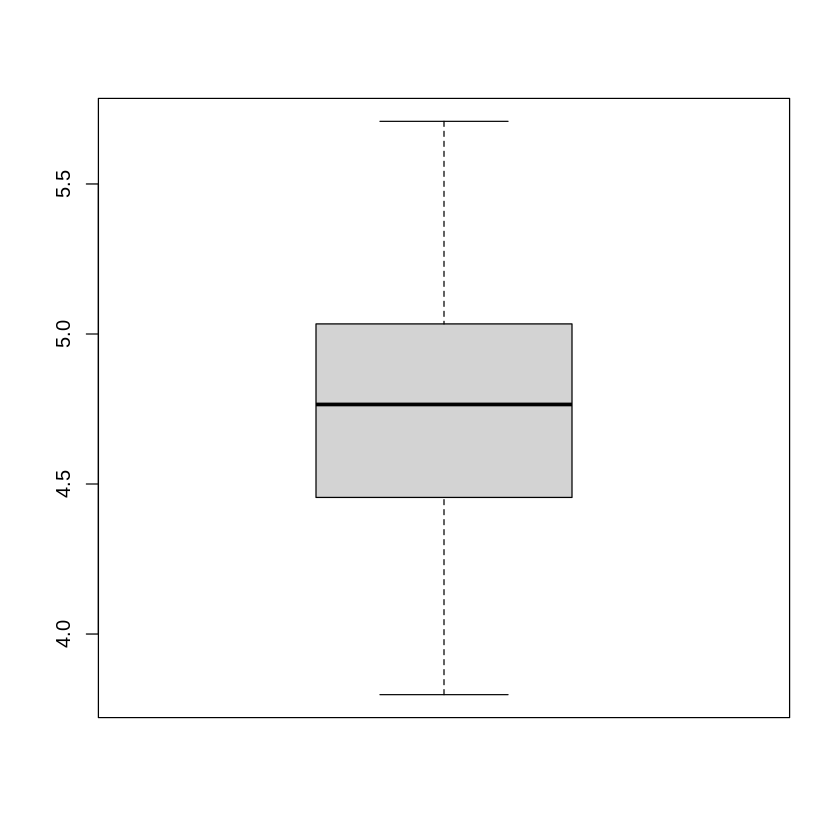

In [ ]:
boxplot(MSE)

In [ ]:
nrep <- 100
n <- dim(GaltonFamilies)[1]
ntest <- 200
MSE <- data.frame(matrix(0,nrep,1))
names(MSE) <- c("lm")
for (knn_k in 1:25){
set.seed(1)
for (i in 1:nrep){

n <- dim(GaltonFamilies)[1]

train <- sample(1:n, n-ntest, replace = FALSE) 
data(GaltonFamilies)

n <- dim(GaltonFamilies)[1]

train <- sample(1:n, n-ntest, replace = FALSE) 
traindata <- GaltonFamilies[train,c("family", "father", "mother", "gender", "childHeight")]


new_train<-traindata[0,]
for (f in unique(traindata$family)){
    fam = subset(traindata, family==f)
    for (g in unique(fam$gender)){
        gen = subset(fam, gender==g)
        df<-data.frame(f, mean(gen$father),mean(gen$mother), g, mean(gen$childHeight))
        names(df)<-c("family","father","mother","gender","childHeight")
        new_train = rbind(new_train, df)
    }
}

traindata <- new_train[,c("father", "mother", "gender")]

gender_bin <- rep(0, nrow(traindata))
gender_bin[traindata$gender == 'male'] <- 1
traindata <- data.frame(traindata, gender_bin)
traindata <- traindata[,c("father", "mother", "gender_bin")]

traindata_y <- new_train[,c("childHeight")]
testdata <- GaltonFamilies[-train,c("father", "mother", "gender")]

gender_bin <- rep(0, nrow(testdata))
gender_bin[testdata$gender == 'male'] <- 1
testdata <- data.frame(testdata, gender_bin)
testdata <- testdata[,c("father", "mother", "gender_bin")]

testdata_y <- GaltonFamilies[-train,c("childHeight")]

trainMean <- apply(traindata[,c("father", "mother")],2,mean)
trainSd <- apply(traindata[,c("father", "mother")],2,sd)
# trainMean <- apply(GaltonFamilies[train,c("father", "mother")],2,mean)
# trainSd <- apply(GaltonFamilies[train,c("father", "mother")],2,sd)

traindata_n <- sweep(sweep(traindata[,c("father", "mother")], 2L, trainMean), 2, trainSd, "/")
testdata_n <- sweep(sweep(testdata[,c("father", "mother")], 2L, trainMean), 2, trainSd, "/")

traindata["childHeight"] = traindata_y
testdata["childHeight"] = testdata_y


fit_baseline <- lm(childHeight ~ . + father*mother, data = traindata)

# knn_k = 3
k <- knn(
    traindata[,c("father", "mother", "gender_bin")], 
    testdata[,c("father", "mother", "gender_bin")], 
    traindata[,"childHeight"], 
    k = knn_k)
indices = attr(k, "nn.index")
height_baseline_pred <- c(0,ntest)

for (j in 1:ntest){
    pred_knn = predict(fit_baseline,data.frame(traindata[indices[j,],]))
    pred = predict(fit_baseline,testdata[j,])
    # height_baseline_pred[j] <- mean(pred_knn, pred)
    alpha = 0
    height_baseline_pred[j] <- alpha*pred + (1-alpha)*mean(pred_knn)
    # height_baseline_pred[j] <- alpha*pred + (1-alpha)*mean(traindata[indices[j,],]$childHeight)
}

MSE[i,1] <- mean((testdata$childHeight - height_baseline_pred)^2)
}
print(sum(MSE)/nrep)
flush.console()
}

[1] 5.173513
[1] 5.735028
[1] 5.725952
[1] 5.853134
[1] 5.994243
[1] 6.086111
[1] 6.238389
[1] 6.32644
[1] 6.546932
[1] 6.69488
[1] 6.837869
[1] 6.982507
[1] 7.146701
[1] 7.319004
[1] 7.516949


In [ ]:
nrep <- 100
n <- dim(GaltonFamilies)[1]
ntest <- 200
MSE <- data.frame(matrix(0,nrep,1))
names(MSE) <- c("lm")
# for (knn_k in 1:25){
# for (alpha in seq(0,1,0.05)){
for (vknn in seq(0,2,0.1)){
set.seed(1)
for (i in 1:nrep){

n <- dim(GaltonFamilies)[1]

train <- sample(1:n, n-ntest, replace = FALSE) 
data(GaltonFamilies)

n <- dim(GaltonFamilies)[1]

train <- sample(1:n, n-ntest, replace = FALSE) 
traindata <- GaltonFamilies[train,c("family", "father", "mother", "gender", "childHeight")]


new_train<-traindata[0,]
for (f in unique(traindata$family)){
    fam = subset(traindata, family==f)
    for (g in unique(fam$gender)){
        gen = subset(fam, gender==g)
        df<-data.frame(f, mean(gen$father),mean(gen$mother), g, mean(gen$childHeight))
        names(df)<-c("family","father","mother","gender","childHeight")
        new_train = rbind(new_train, df)
    }
}

traindata <- new_train[,c("father", "mother", "gender")]

gender_bin <- rep(0, nrow(traindata))
gender_bin[traindata$gender == 'male'] <- 1
traindata <- data.frame(traindata, gender_bin)
traindata <- traindata[,c("father", "mother", "gender_bin")]

traindata_y <- new_train[,c("childHeight")]
testdata <- GaltonFamilies[-train,c("father", "mother", "gender")]

gender_bin <- rep(0, nrow(testdata))
gender_bin[testdata$gender == 'male'] <- 1
testdata <- data.frame(testdata, gender_bin)
testdata <- testdata[,c("father", "mother", "gender_bin")]

testdata_y <- GaltonFamilies[-train,c("childHeight")]

trainMean <- apply(traindata[,c("father", "mother")],2,mean)
trainSd <- apply(traindata[,c("father", "mother")],2,sd)
# trainMean <- apply(GaltonFamilies[train,c("father", "mother")],2,mean)
# trainSd <- apply(GaltonFamilies[train,c("father", "mother")],2,sd)

traindata_n <- sweep(sweep(traindata[,c("father", "mother")], 2L, trainMean), 2, trainSd, "/")
testdata_n <- sweep(sweep(testdata[,c("father", "mother")], 2L, trainMean), 2, trainSd, "/")

traindata["childHeight"] = traindata_y
testdata["childHeight"] = testdata_y


fit_baseline <- lm(childHeight ~ . + father*mother, data = traindata)

knn_k = 3
k <- knn(
    traindata[,c("father", "mother", "gender_bin")], 
    testdata[,c("father", "mother", "gender_bin")], 
    traindata[,"childHeight"], 
    k = knn_k)
indices = attr(k, "nn.index")
height_baseline_pred <- c(0,ntest)

for (j in 1:ntest){
    # pred_knn = predict(fit_baseline,data.frame(traindata[indices[j,],]))
    pred_knn = traindata[indices[j,],]$childHeight
    pred = predict(fit_baseline,testdata[j,])
    if (var(pred_knn) > vknn){ # 4
        # print(var(pred_knn) )
        alpha = 1
    }
    else{
        alpha = 0
    }
    # height_baseline_pred[j] <- mean(pred_knn, pred)
    # alpha = 0 #try
    # height_baseline_pred[j] <- alpha*pred + (1-alpha)*mean(pred_knn)
    height_baseline_pred[j] <- alpha*pred + (1-alpha)*mean(pred_knn)
}

MSE[i,1] <- mean((testdata$childHeight - height_baseline_pred)^2)
}
print(sum(MSE)/nrep)
flush.console()
}

[1] 4.690626
[1] 4.713982
[1] 4.735218
[1] 4.749794


In [ ]:
nrep <- 100
n <- dim(GaltonFamilies)[1]
ntest <- 200
MSE <- data.frame(matrix(0,nrep,1))
names(MSE) <- c("lm")
# for (knn_k in 1:25){
for (alpha in seq(0.75,0.85,0.01)){
set.seed(1)
for (i in 1:nrep){

n <- dim(GaltonFamilies)[1]

train <- sample(1:n, n-ntest, replace = FALSE) 
data(GaltonFamilies)

n <- dim(GaltonFamilies)[1]

train <- sample(1:n, n-ntest, replace = FALSE) 
traindata <- GaltonFamilies[train,c("family", "father", "mother", "gender", "childHeight")]


new_train<-traindata[0,]
for (f in unique(traindata$family)){
    fam = subset(traindata, family==f)
    for (g in unique(fam$gender)){
        gen = subset(fam, gender==g)
        df<-data.frame(f, mean(gen$father),mean(gen$mother), g, mean(gen$childHeight))
        names(df)<-c("family","father","mother","gender","childHeight")
        new_train = rbind(new_train, df)
    }
}

traindata <- new_train[,c("father", "mother", "gender")]

gender_bin <- rep(0, nrow(traindata))
gender_bin[traindata$gender == 'male'] <- 1
traindata <- data.frame(traindata, gender_bin)
traindata <- traindata[,c("father", "mother", "gender_bin")]

traindata_y <- new_train[,c("childHeight")]
testdata <- GaltonFamilies[-train,c("father", "mother", "gender")]

gender_bin <- rep(0, nrow(testdata))
gender_bin[testdata$gender == 'male'] <- 1
testdata <- data.frame(testdata, gender_bin)
testdata <- testdata[,c("father", "mother", "gender_bin")]

testdata_y <- GaltonFamilies[-train,c("childHeight")]

trainMean <- apply(traindata[,c("father", "mother")],2,mean)
trainSd <- apply(traindata[,c("father", "mother")],2,sd)
# trainMean <- apply(GaltonFamilies[train,c("father", "mother")],2,mean)
# trainSd <- apply(GaltonFamilies[train,c("father", "mother")],2,sd)

traindata_n <- sweep(sweep(traindata[,c("father", "mother")], 2L, trainMean), 2, trainSd, "/")
testdata_n <- sweep(sweep(testdata[,c("father", "mother")], 2L, trainMean), 2, trainSd, "/")

traindata["childHeight"] = traindata_y
testdata["childHeight"] = testdata_y


fit_baseline <- lm(childHeight ~ . + father*mother, data = traindata)

knn_k = 3
k <- knn(
    traindata[,c("father", "mother", "gender_bin")], 
    testdata[,c("father", "mother", "gender_bin")], 
    traindata[,"childHeight"], 
    k = knn_k)
indices = attr(k, "nn.index")
height_baseline_pred <- c(0,ntest)

for (j in 1:ntest){
    pred_knn = predict(fit_baseline,data.frame(traindata[indices[j,],]))
    pred = predict(fit_baseline,testdata[j,])
    # height_baseline_pred[j] <- mean(pred_knn, pred)
    # alpha = 0
    # height_baseline_pred[j] <- alpha*pred + (1-alpha)*mean(pred_knn)
    height_baseline_pred[j] <- alpha*pred + (1-alpha)*mean(traindata[indices[j,],]$childHeight)
}

MSE[i,1] <- mean((testdata$childHeight - height_baseline_pred)^2)
}
print(sum(MSE)/nrep)
flush.console()
}

[1] 4.613352
[1] 4.611197
[1] 4.609493
[1] 4.608241
[1] 4.60744
[1] 4.607091
[1] 4.607193
[1] 4.607746
[1] 4.608751
[1] 4.610207
[1] 4.612114


In [24]:
nrep <- 100
n <- dim(GaltonFamilies)[1]
ntest <- 200
MSE <- data.frame(matrix(0,nrep,1))
names(MSE) <- c("lm")
# for (knn_k in 1:25){
# for (a in seq(0,1,0.1)){
set.seed(1)
for (i in 1:nrep){

n <- dim(GaltonFamilies)[1]

train <- sample(1:n, n-ntest, replace = FALSE) 
data(GaltonFamilies)

n <- dim(GaltonFamilies)[1]

train <- sample(1:n, n-ntest, replace = FALSE) 
traindata <- GaltonFamilies[train,c("family", "father", "mother", "gender", "childHeight")]


new_train<-traindata[0,]
for (f in unique(traindata$family)){
    fam = subset(traindata, family==f)
    for (g in unique(fam$gender)){
        gen = subset(fam, gender==g)
        df<-data.frame(f, mean(gen$father),mean(gen$mother), g, mean(gen$childHeight))
        names(df)<-c("family","father","mother","gender","childHeight")
        new_train = rbind(new_train, df)
    }
}

traindata <- new_train[,c("father", "mother", "gender")]

gender_bin <- rep(0, nrow(traindata))
gender_bin[traindata$gender == 'male'] <- 1
traindata <- data.frame(traindata, gender_bin)
traindata <- traindata[,c("father", "mother", "gender_bin")]

traindata_y <- new_train[,c("childHeight")]
testdata <- GaltonFamilies[-train,c("father", "mother", "gender")]

gender_bin <- rep(0, nrow(testdata))
gender_bin[testdata$gender == 'male'] <- 1
testdata <- data.frame(testdata, gender_bin)
testdata <- testdata[,c("father", "mother", "gender_bin")]

testdata_y <- GaltonFamilies[-train,c("childHeight")]

trainMean <- apply(traindata[,c("father", "mother")],2,mean)
trainSd <- apply(traindata[,c("father", "mother")],2,sd)
# trainMean <- apply(GaltonFamilies[train,c("father", "mother")],2,mean)
# trainSd <- apply(GaltonFamilies[train,c("father", "mother")],2,sd)

traindata_n <- sweep(sweep(traindata[,c("father", "mother")], 2L, trainMean), 2, trainSd, "/")
testdata_n <- sweep(sweep(testdata[,c("father", "mother")], 2L, trainMean), 2, trainSd, "/")

traindata["childHeight"] = traindata_y
testdata["childHeight"] = testdata_y


fit_baseline <- lm(childHeight ~ . + father*mother, data = traindata)

knn_k = 3
k <- knn(
    traindata[,c("father", "mother", "gender_bin")], 
    testdata[,c("father", "mother", "gender_bin")], 
    traindata[,"childHeight"], 
    k = knn_k)
indices = attr(k, "nn.index")
height_baseline_pred <- c(0,ntest)

for (j in 1:ntest){
    pred_knn = predict(fit_baseline,data.frame(traindata[indices[j,],]))
    pred = predict(fit_baseline,testdata[j,])
    # height_baseline_pred[j] <- mean(pred_knn, pred)
    # alpha = 0.75
    # height_baseline_pred[j] <- alpha*pred + (1-alpha)*mean(pred_knn)
    if (abs(knn_k*testdata[j,]$gender_bin-sum(traindata[indices[j,],]$gender_bin)) > (knn_k-1)){
        alpha = 1
    }
    else if (abs(knn_k*testdata[j,]$gender_bin-sum(traindata[indices[j,],]$gender_bin)) > (knn_k-2)){
        alpha = 0.99
    }
    else if (abs(knn_k*testdata[j,]$gender_bin-sum(traindata[indices[j,],]$gender_bin)) > (knn_k-3)){
        alpha = 0.8
    }
    else{
        alpha = 0.76
    }
    height_baseline_pred[j] <- alpha*pred + (1-alpha)*mean(traindata[indices[j,],]$childHeight)
}

MSE[i,1] <- mean((testdata$childHeight - height_baseline_pred)^2)
}
print(sum(MSE)/nrep)
flush.console()
# }

[1] 4.585928


In [ ]:
10nn
-8 [1] 4.69628
-9 [1] 4.689891

7nn
-3 [1] 4.70765
-4 [1] 4.659979
-6 [1] 4.682252
-5
[1] 5.247379
[1] 5.100202
[1] 4.973453
[1] 4.867133
[1] 4.781241
[1] 4.715778
[1] 4.670743
[1] 4.646136
[1] 4.641958
[1] 4.658208
[1] 4.694887

3nn
-2(0.71,0.85)
[1] 4.591371
[1] 4.589889
[1] 4.588768
[1] 4.588008
[1] 4.587608
[1] 4.587569
[1] 4.587891
[1] 4.588574
[1] 4.589618
[1] 4.591022
[1] 4.592788
[1] 4.594914
-1
[1] 6.023788
[1] 5.691156
[1] 5.402912
[1] 5.159054
[1] 4.959584
[1] 4.8045
[1] 4.693803
[1] 4.627494
[1] 4.605571
[1] 4.628035
[1] 4.694887
-2
[1] 5.61887
[1] 5.3641
[1] 5.145412
[1] 4.962807
[1] 4.816285
[1] 4.705846
[1] 4.631489
[1] 4.593214
[1] 4.591022
[1] 4.624913